In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import numpy
import netCDF4 as nc
from scipy.stats import norm
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit

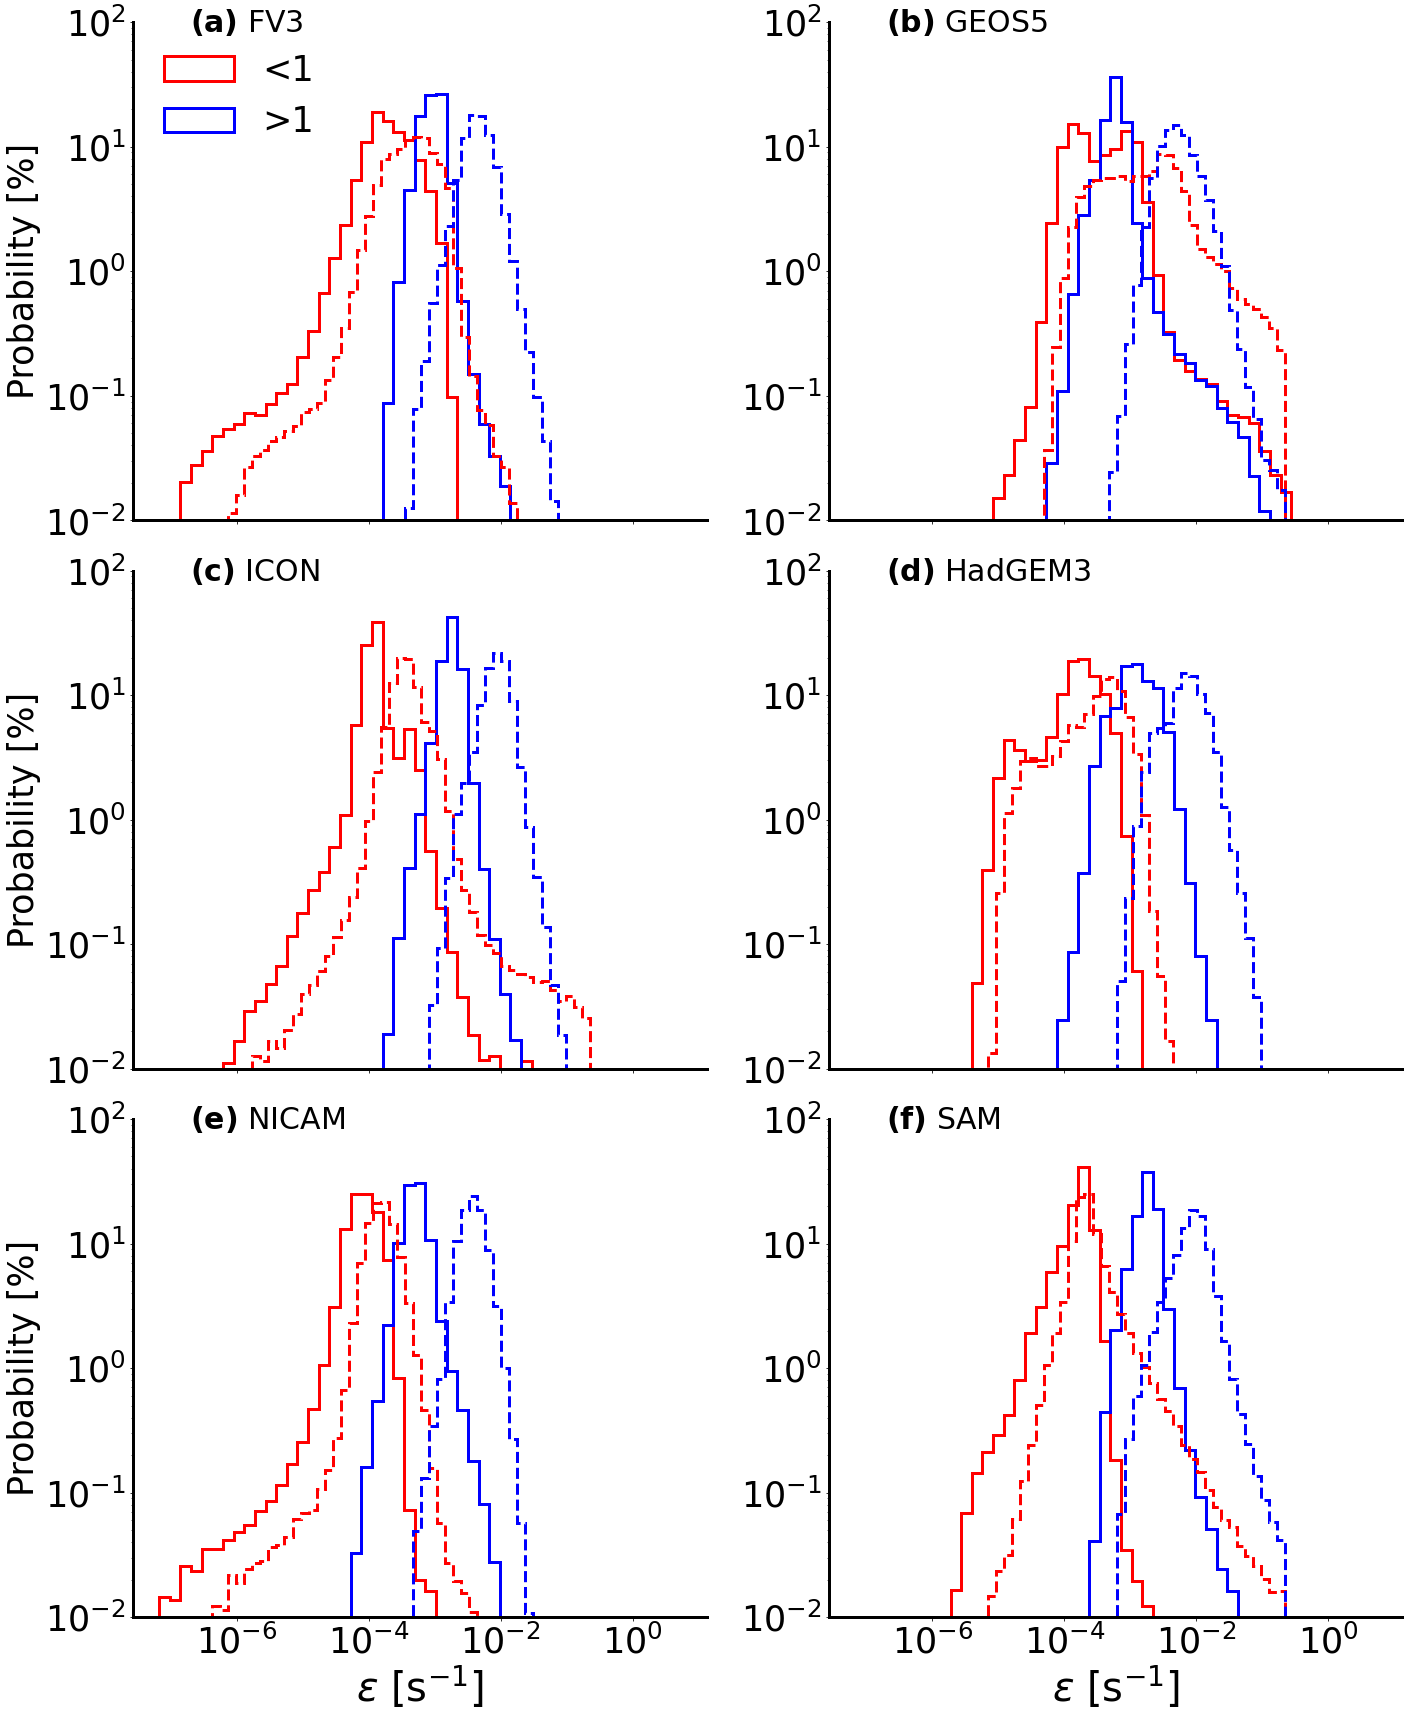

In [14]:

basedir = '/input/directory/'
models = ['FV3', 'GEOS5', 'ICON', 'HadGEM3', 'NICAM', 'SAM']

datasets_0001 = [basedir + f'{model}_PRECEFF_less1mm_hr_20160809-20160909_Asia_timeavg.nc' for model in models]
datasets_1 = [basedir + f'{model}_PRECEFF_1mm_hr_20160809-20160909_Asia_timeavg.nc' for model in models]

datasets_0001 = [xr.open_dataset(ds) for ds in datasets_0001]
datasets_1 = [xr.open_dataset(ds) for ds in datasets_1]

values_0001 = [ds['PRECEFF_TIMEAVG'].values.flatten() for ds in datasets_0001]
values_1 = [ds['PRECEFF_TIMEAVG'].values.flatten() for ds in datasets_1]

wgts_0001 = [np.ones_like(vals)/len(vals)*100 for vals in values_0001]
wgts_1 = [np.ones_like(vals)/len(vals)*100 for vals in values_1]

basedir_daily = '/xdisk/sylvia/temakgoale/DYAMOND/DYAMOND_PRECEFF/PRECEFF_DAILYAVG_CWP_FILTERED/'
datasets_0001_d = [basedir_daily + f'{model}_PRECEFF_less1mm_daily_20160809-20160909_Asia_timeavg.nc' for model in models]
datasets_1_d = [basedir_daily + f'{model}_PRECEFF_1mm_daily_20160809-20160909_Asia_timeavg.nc' for model in models]

datasets_0001_d = [xr.open_dataset(ds) for ds in datasets_0001_d]
datasets_1_d = [xr.open_dataset(ds) for ds in datasets_1_d]
values_0001_d = [ds['PRECEFF_TIMEAVG'].values.flatten() for ds in datasets_0001_d]
values_1_d = [ds['PRECEFF_TIMEAVG'].values.flatten() for ds in datasets_1_d]

wgts_0001_d = [np.ones_like(vals)/len(vals)*100 for vals in values_0001_d]
wgts_1_d = [np.ones_like(vals)/len(vals)*100 for vals in values_1_d]

fig, axs = plt.subplots(3, 2, figsize=(20, 24))
bins1 = np.logspace(np.log10(min(values_0001[2])), np.log10(max(values_1[2])), num=50)
bins2 = np.logspace(np.log10(min(values_0001_d[2])), np.log10(max(values_1_d[2])), num=50)
for i, (model_vals, model_vals_d, ax, model_name, wgt_0001, wgt_1, wgt_0001_d, wgt_1_d) in enumerate(zip(
    values_0001, values_0001_d, axs.flatten(), models, wgts_0001, wgts_1, wgts_0001_d, wgts_1_d)):
    
    ax.hist(model_vals, bins=bins1, edgecolor='red', lw=3, density=False, histtype='step', log=True, label='<1', weights=wgt_0001)
    ax.hist(values_1[i], bins=bins1, edgecolor='blue', lw=3, density=False, histtype='step', log=True, label='>1', weights=wgt_1)
    ax.hist(model_vals_d, bins=bins2, edgecolor='red', lw=3, linestyle='--', density=False, histtype='step', log=True, weights=wgt_0001_d)
    ax.hist(values_1_d[i], bins=bins2, edgecolor='blue', lw=3, linestyle='--', density=False, histtype='step', log=True, weights=wgt_1_d)
    ax.set_xscale('log')
    ax.set_ylim((10**-2, 10**2))
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    
    ax.patch.set_facecolor('white')
    
    ax.tick_params(axis='y', labelsize=35)
    
    if i < 4:
        ax.tick_params(axis='x', labelbottom=False)  
    else:
        ax.tick_params(axis='x', labelsize=35)  
    
    if i == 0:
        ax.legend(loc='upper left', fontsize=35, frameon=False)
    
    if i % 2 == 0:
        ax.set_ylabel('Probability [%]', fontsize=35)
        
    if i >= 4:
        ax.set_xlabel(r'$\epsilon$ [s$^{-1}$]', fontsize=40)
        
    ax.text(0.1, 0.98, rf'$\bf{{({chr(97+i)})}}$ {model_name}', transform=ax.transAxes, fontsize=30)
    
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig('/output/directory/Probability_Density.png', dpi=50, bbox_inches='tight')
plt.savefig('/output/directory/Probability_Density.pdf', format="pdf", dpi=50, bbox_inches='tight')
plt.show()